# Numpy Exercise 3

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import antipackage
import github.ellisonbg.misc.vizarray as va

Downloading:  https://raw.githubusercontent.com/ellisonbg/misc/master/vizarray.py
Using existing version:  github.ellisonbg.misc.vizarray


## Geometric Brownian motion

Here is a function that produces standard Brownian motion using NumPy. This is also known as a [Wiener Process](http://en.wikipedia.org/wiki/Wiener_process).

In [3]:
def brownian(maxt, n):
    """Return one realization of a Brownian (Wiener) process with n steps and a max time of t."""
    t = np.linspace(0.0,maxt,n)
    h = t[1]-t[0]
    Z = np.random.normal(0.0,1.0,n-1)
    dW = np.sqrt(h)*Z
    W = np.zeros(n)
    W[1:] = dW.cumsum()
    return t, W

Call the `brownian` function to simulate a Wiener process with `1000` steps and max time of `1.0`. Save the results as two arrays `t` and `W`.

In [4]:
t,W=brownian(1,1000)

In [5]:
assert isinstance(t, np.ndarray)
assert isinstance(W, np.ndarray)
assert t.dtype==np.dtype(float)
assert W.dtype==np.dtype(float)
assert len(t)==len(W)==1000

Visualize the process using `plt.plot` with `t` on the x-axis and `W(t)` on the y-axis. Label your x and y axes.

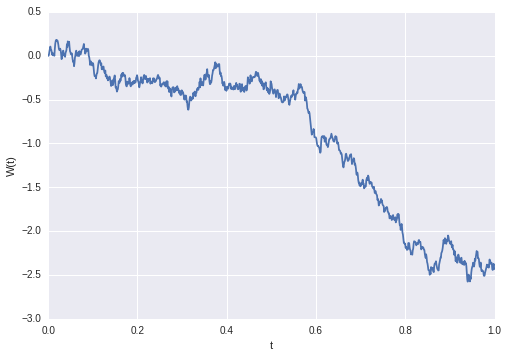

In [6]:
plt.plot(t,W)
plt.xlabel("t")
plt.ylabel("W(t)")

In [7]:
assert True # this is for grading

Use `np.diff` to compute the changes at each step of the motion, `dW`, and then compute the mean and standard deviation of those differences.

In [8]:
dW=np.diff(W)
print dW.mean()
print dW.std()

-0.00243491486967
0.0317259798163


In [9]:
assert len(dW)==len(W)-1
assert dW.dtype==np.dtype(float)

Write a function that takes $W(t)$ and converts it to geometric Brownian motion using the equation:

$$
X(t) = X_0 e^{((\mu - \sigma^2/2)t + \sigma W(t))}
$$

Use Numpy ufuncs and no loops in your function.

In [10]:
def geo_brownian(t, W, X0, mu, sigma):
    "Return X(t) for geometric brownian motion with drift mu, volatility sigma."""
    x=(X0)*np.exp((mu-(sigma**2)/2)*(t)+sigma*(W))
    return x,t

In [11]:
assert True # leave this for grading

Use your function to simulate geometric brownian motion, $X(t)$ for $X_0=1.0$, $\mu=0.5$ and $\sigma=0.3$ with the Wiener process you computed above.

Visualize the process using `plt.plot` with `t` on the x-axis and `X(t)` on the y-axis. Label your x and y axes.

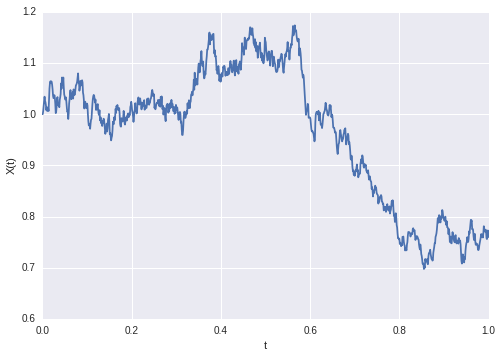

In [12]:
x,t=geo_brownian(t,W, 1.0, .5, .3) #plotting with variables
plt.plot(t,x)
plt.xlabel("t")
plt.ylabel("X(t)")

In [13]:
assert True # leave this for grading